# Final Project

**Due date: Saturday, December 9th**

For your final project you will develop a data narrative with a dataset of your choosing. Your data can come from any source. You do not have to comprehensively explore your data. Pick an interesting aspect or two from which to build your narrative.

## Requirements

- At least **three** visualizations. Visualizations can be simple bar charts that total data categories or rich exploratory figures. (*Tables also count as visualizations but you must have at least two charts.*) 
- All of the code should be recorded in your narrative. That is, I should be able to run your notebook code start to finish re-producing each of your outputs without error.
- At least **two** but no more than **three** paragraphs walking the reader through your analysis.
- Charts should exhibit your command of `ggplot2/dplyr/forcats/tidyr` with: 
  - sensibly sorted categories, 
  - interpretable labels/axis titles, 
  - useful annotations (when applicable), 
  - adjustments to default chart aesthetics, 
  - appropriate markings (e.g. `geoms`) and encodings.

## Notes

*This project should not take you longer than the time to complete two of our assignments. It is meant to demonstrate that you can build an analysis using `R` and the `Tidyverse` from scratch. Focus your analysis on a small number of data features that you find interesting.*

*Remember all the ways of visualizing distributions (ECDFs, histograms, jitter-ed scatter plots, etc.). These will come in very handy!* 

In [2]:
library('tidyverse')
install.packages(c("tayloRswift"))
library(tayloRswift)
library(ggplot2)
library("ggrepel")

Warning message:
“Failed to locate timezone database”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [3]:
taylor_all_songs <- readr::read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-10-17/taylor_all_songs.csv')

Rows: 274 Columns: 29
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (7): album_name, track_name, artist, featuring, key_name, mode_name, k...
dbl  (14): track_number, danceability, energy, key, loudness, mode, speechin...
lgl   (4): ep, bonus_track, explicit, lyrics
date  (4): album_release, promotional_release, single_release, track_release

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
# head(taylor_all_songs)

In [5]:
#Visualization 1: Table of the Average Danceability of T-Swift Albums

dance = taylor_all_songs |>
    filter(!is.na(danceability)) |>
    group_by(album_name) |>
    summarize(danceability_avg = mean(danceability)) |>
    arrange(desc(danceability_avg))
dance

album_name,danceability_avg
<chr>,<dbl>
Lover,0.6582222
reputation,0.6579333
Red,0.6333636
The Taylor Swift Holiday Collection,0.6266667
Midnights,0.6266500
1989,0.6239375
Red (Taylor's Version),0.5769667
Fearless,0.5759474
NA,0.5631600


In [7]:
keep = c("album_name", "track_name", "featuring", "album_release")
t <- taylor_all_songs[, keep]

# number of features on each album
feat = t |>
    mutate(feat_count = ifelse(is.na(featuring), 0, 1)) |>
    filter(!is.na(album_name)) |>
    group_by(album_name, album_release) |>
    summarize(feat_count = sum(feat_count))

`summarise()` has grouped output by 'album_name'. You can override using the
`.groups` argument.


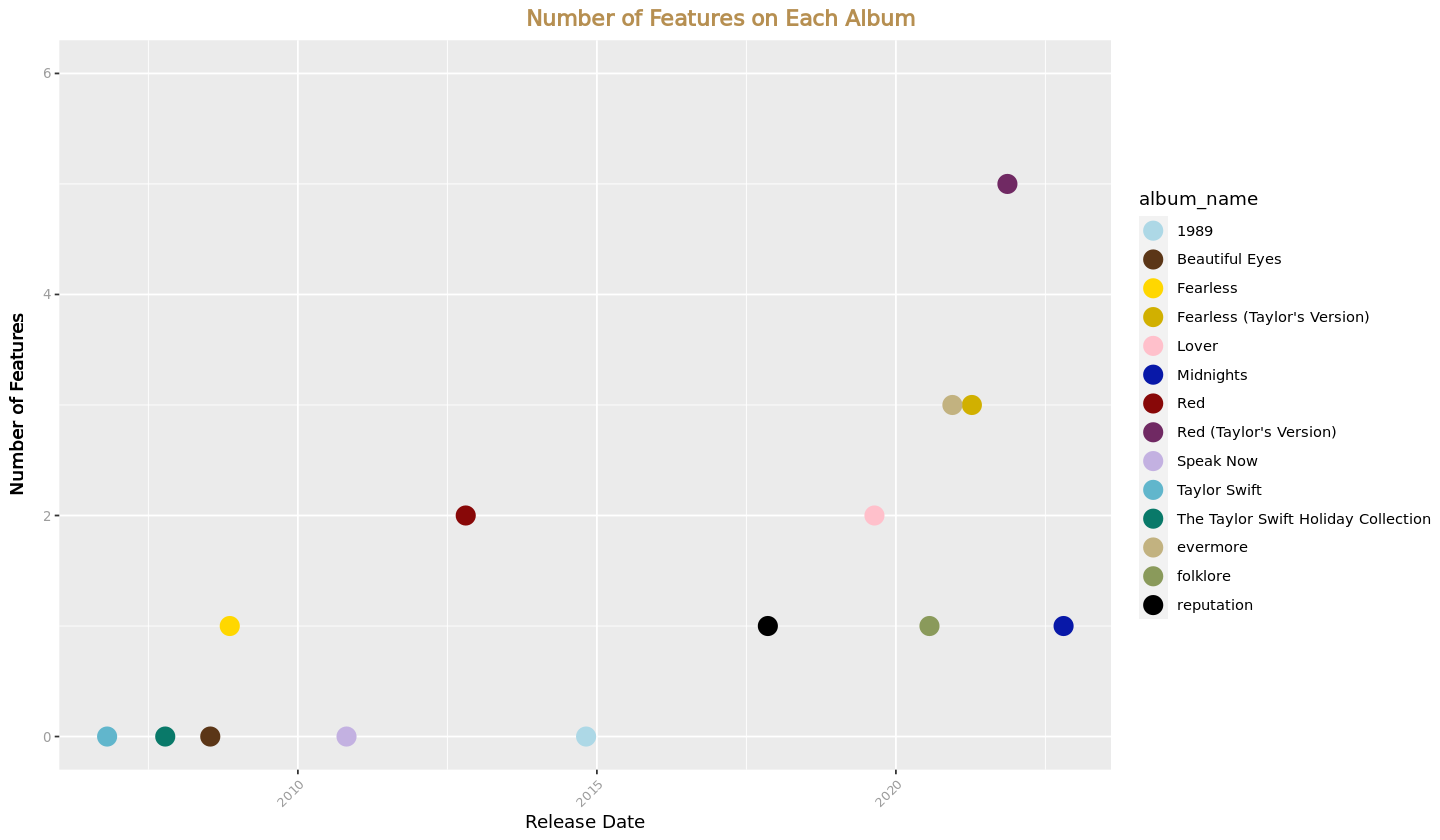

In [8]:
#Visualization 2: Plot number of features on each album

options(repr.plot.height = 7, repr.plot.width = 12, resolution = 1000)

colors <- c("#ADD8E6","#5b3617", "#FFD700", "#D1B000", "#FFC0CB", "#0818A8", "#880808", "#702963", "#C3B1E1",
           "#61b6cc", "#097969", "#C2B280", "#8A9A5B", "#000000")

p = ggplot(feat, aes(x=album_release, y = feat_count, color = album_name)) + 
    geom_point(size = 5) +
    scale_color_manual(values = colors) +
    ylim(0,6) +
    labs(x = 'Release Date', y = 'Number of Features', title = "Number of Features on Each Album") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1),
          plot.title = element_text(color = '#b68f51', face = 'bold', hjust = 0.5),
          plot.title.position = 'plot',
          axis.title.y = element_text(face = 'bold', margin = margin(r = 10)),
          axis.text = element_text(color = '#9d9d9d', family = 'DecimaMonoPro', size = 8))
p

In [9]:
# happiest song in each album
happiest = taylor_all_songs |> 
    group_by(album_name) |>
    slice_max(valence, n = 1, na_rm = T) |>
    select(album_name, track_name, valence) |>
    mutate(category = 'happiest')

# saddest song in each album
saddest = taylor_all_songs |> 
    group_by(album_name) |>
    slice_min(valence, n = 1, na_rm = T) |>
    select(album_name, track_name, valence) |>
    mutate(category = 'saddest')

# combine above two tables
df_happy_sad = rbind(happiest, saddest)

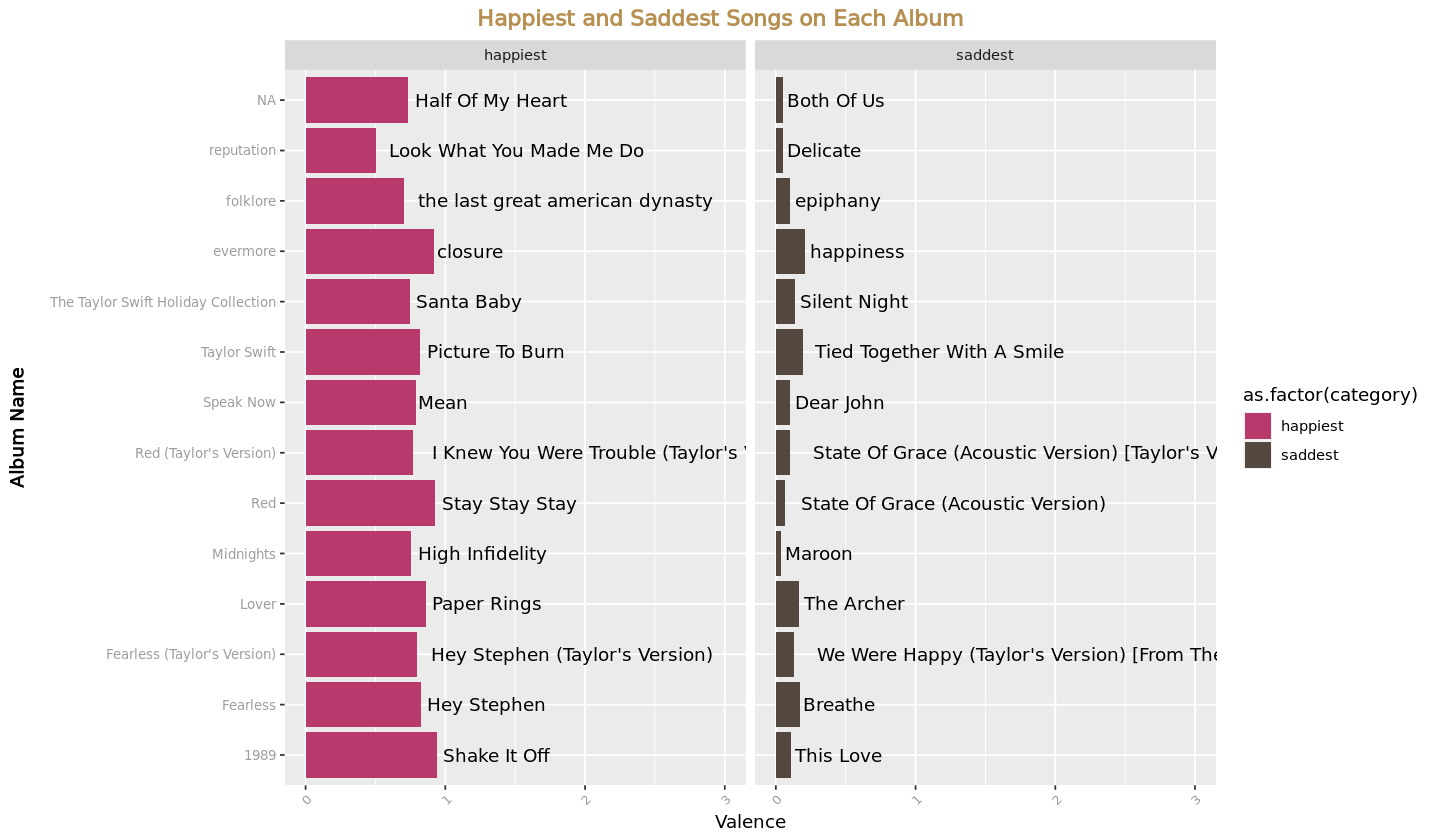

In [10]:
# Visualization 3: Bar graph of happiest/saddest songs on each Taylor album

p = ggplot(df_happy_sad, aes(x = valence, y = album_name, label = track_name, fill = as.factor(category))) + 
    geom_col() + 
    facet_wrap(~category) +
    geom_text(hjust = -.05) + xlim(0, 3) +
    labs(x = 'Valence', y = 'Album Name', title = "Happiest and Saddest Songs on Each Album") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1),
          plot.title = element_text(color = '#b68f51', face = 'bold', hjust = 0.5),
          plot.title.position = 'plot',
          axis.title.y = element_text(face = 'bold', margin = margin(r = 10)),
          axis.text = element_text(color = '#9d9d9d', family = 'DecimaMonoPro', size = 8)) +
    scale_fill_taylor(palette = "lover")

p

Analysis

As a big Taylor Swift fan, I wanted to explore a dataset to learn more about the artist's career and discography. For my first visualization, I made a table of the average danceability of each Taylor Swift album. After sorting the table in descending danceability, and saw that Lover has the highest danceability score, which makes sense to me because this is a very pop-heavy album compared to the rest of Taylor's discography. 

My second visualization was a scatterplot displaying the number of features on each album. To do this, I started out by making another data frame that only included relevant variables and summed up the number of features on each album. For the plot itself, I graphed the points in chronological order, and manually added hex codes for each point so that each album would be a color that I felt represented the album well. This plot provides us with a fun way to view a history of Taylor Swift's collaborations over time.

For my last visualization, I wanted to graphically view how the happiest and saddest songs on each album compare to each other. I started this process by creating two separate datasets where I found the happiest and saddest songs on each album, and then I combined it into one data frame. I then made a bar graph faceted by the happiest/saddest category, made the x-axis valence (the happiness measurement), and the y-axis was album name. Being able to view this data in this format made it very easy to compare these songs to each other. 